<a href="https://colab.research.google.com/github/exponentialR/DeepLearningFundamentals/blob/main/Simple%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Get the data
!wget https://raw.githubusercontent.com/exponentialR/DeepLearningFundamentals/main/moore.csv

--2020-11-10 15:29:32--  https://raw.githubusercontent.com/exponentialR/DeepLearningFundamentals/main/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-11-10 15:29:32 (48.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
#Load in the data
data = pd.read_csv('moore.csv', header = None).values
X = data[:, 0].reshape(-1, 1) #make it a 2-D array of size N xD where D = 1 
Y = data[:, 1]

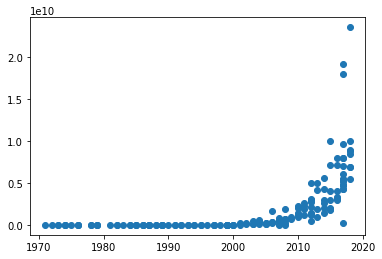

In [4]:
#now plot the data to the get the data curve/path (this visually determines, if it's linear or geometric or exponential)

plt.scatter(X, Y)

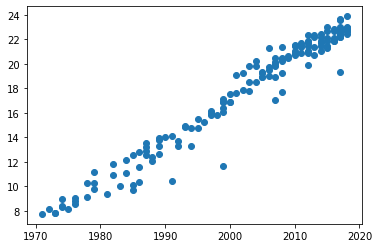

In [5]:
#We need to find a way to convert the model into a linear model, since it is still exponential

Y = np.log(Y)
plt.scatter (X, Y)

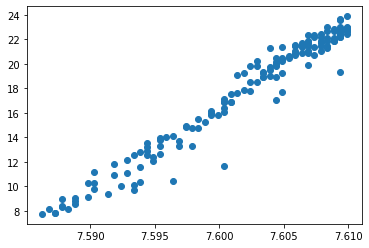

In [6]:
B = np.log(X)
plt.scatter(B, Y) 

In [7]:
#Now scale the X data so the values of the input are not too large. This is done by finding the difference between the input (X) amd the mean of the input (X), then equating it to the data input (X)

X = X - X.mean()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


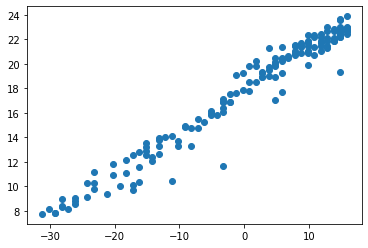

In [8]:
C = np.log(X)
plt.scatter(X, Y)

In [12]:
#It is time to create the model using tensorflow 
#remember for Logistics regression there is no activation function as with the case of classification model where sigmoid was used

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile (optimizer=tf.keras.optimizers.SGD(0.01, 0.9), loss = 'mse')


def schedule (epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Train the model 

r = model.fit(X, Y, epochs = 300, callbacks=[scheduler])

Epoch 1/300
6/6 [==============================] - 0s 2ms/step - loss: 364.4918
Epoch 2/300
6/6 [==============================] - 0s 2ms/step - loss: 294.2068
Epoch 3/300
6/6 [==============================] - 0s 1ms/step - loss: 297.2785
Epoch 4/300
6/6 [==============================] - 0s 1ms/step - loss: 215.9109
Epoch 5/300
6/6 [==============================] - 0s 1ms/step - loss: 188.9043
Epoch 6/300
6/6 [==============================] - 0s 2ms/step - loss: 140.0473
Epoch 7/300
6/6 [==============================] - 0s 1ms/step - loss: 92.8825
Epoch 8/300
6/6 [==============================] - 0s 1ms/step - loss: 69.1188
Epoch 9/300
6/6 [==============================] - 0s 2ms/step - loss: 46.7550
Epoch 10/300
6/6 [==============================] - 0s 1ms/step - loss: 33.8369
Epoch 11/300
6/6 [==============================] - 0s 2ms/step - loss: 25.0667
Epoch 12/300
6/6 [==============================] - 0s 1ms/step - loss: 25.8782
Epoch 13/300
6/6 [=========================

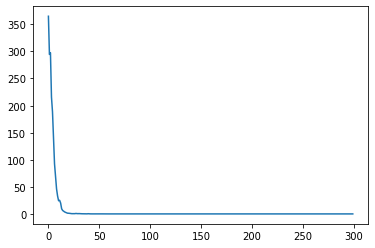

In [13]:
plt.plot(r.history['loss'], label = 'loss')


In [16]:
#Get the slope of the line 

print (model.layers)
print (model.layers[0].get_weights())

[array([[0.34377956]], dtype=float32), array([17.777987], dtype=float32)]


In [17]:
#The slope of the line is 
a = model.layers[0].get_weights()[0][0,0]

In [18]:
print ("Time to double according to Moore's law:", np.log(2)/a)

Time to double according to Moore's law: 2.016254755485965


In [21]:
#for the analytical solution time to double the transistors according to Moore's law

X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean()*X.sum()
a = (X.dot(Y) - Y.mean()*X.sum())/denominator
b = (Y.mean()*X.dot(X)-X.mean()*X.dot (Y))/denominator
print (a, b)
print ("Time to double according to Moore's law: ", np.log(2)/a)

0.341682487387313 17.764939393631764
Time to double according to Moore's law:  2.0286295205239204
